# 2017-04-20: Support Vector Machines
*This page is the practical session of the ["Support Vector Machines"](http://members.cbio.mines-paristech.fr/~jvert/svn/kernelcourse/course/2014esmines/index.html) module taught by Jean-Philippe Vert (LIEN MAJ).* *The lecture slides can be found [here](http://members.cbio.mines-paristech.fr/~jvert/svn/kernelcourse/slides/kernel2h/kernel2h.pdf) (LIEN MAJ).*
*This work is inspired from the SVM-lab of [Centrale course](http://cazencott.info/index.php/pages/MA-2823-Foundations-of-Machine-Learning-%28Fall-2016%29) taught by Chloé-Agathe Azencott *


We will apply support vector classification methods to various datasets. 

Let us start, by setting up our environment.

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Linear case: separable case

In [86]:
# load the corresponding data

X = np.loadtxt('data/linear_SVM:_separable_case/linear1_train.csv',
               delimiter=',', skiprows=1, dtype=float)

X_train = X[:,:-1]
X_test = np.loadtxt('data/linear_SVM:_separable_case/linear1_test_input.csv',
                    delimiter=',', skiprows=1)[:,:-1]
Y_train = X[:,-1]
Y_test = np.loadtxt('data/linear_SVM:_separable_case/linear1_test_output.csv',
                    delimiter=',', skiprows=1).reshape(len(X_test))

# verification
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(np.unique(Y_train), np.unique(Y_test))

((120, 3), (120, 2), (30, 2), (120,), (30,))
(array([-1.,  1.]), array([-1.,  1.]))


### Plot of the data

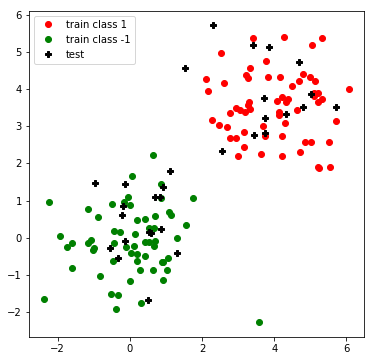

In [87]:
## code
def get_plot(X_train, X_test, Y_train):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.plot(X_train[Y_train==-1,0], X_train[Y_train==-1,1], 'or', label='train class 1')
    ax.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], 'og', label='train class -1')
    ax.plot(X_test[:,0], X_test[:,1], 'Pk', label='test')
    plt.legend(loc='best')
get_plot(X_train, X_test, Y_train)

### Linear SVM with default C value

Let us fit an SVM with linear kernel (linear soft-margin SVM) with default C parameter.

In [53]:
from sklearn import svm

clf = svm.SVC(kernel='linear') 
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

**Question:** Compute the accuracy.

In [54]:
from sklearn import metrics

print(metrics.accuracy_score(Y_test, Y_pred))

1.0


### Number of support vectors

The `n_support_` argument of an svm classifier gives us the number of support vectors for each class.

**Question:** How many support vectors does our classifier have? How many is this compared to the number of training samples?

In [55]:
##TO DO
print(clf.n_support_)

[1 1]


### Separating hyperplane

Let us plot the separating hyperplan and visualize its support vectors.

In [56]:
def plot_data_with_hyperplane(X,Y,clf):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=80, facecolors='none', edgecolors='k')

    plt.axis('tight')
    plt.show()

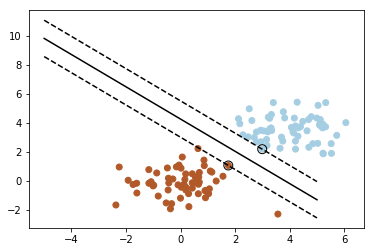

In [57]:
plot_data_with_hyperplane(X_train,Y_train,clf)

## Linear SVM: non separable case

In [89]:
# load the corresponding data
X = np.loadtxt('data/linear_SVM:_non_separable_case/linear2_train.csv',
               delimiter=',', skiprows=1)

X_train = X[:,:-1]
X_test = np.loadtxt('data/linear_SVM:_non_separable_case/linear2_test_input.csv',
                    delimiter=',', skiprows=1)[:,:-1]
Y_train = X[:,-1]
Y_test = np.loadtxt('data/linear_SVM:_non_separable_case/linear2_test_output.csv',
                    delimiter=',', skiprows=1).reshape(len(X_test))


### Linear SVM with default C value

Let us fit an SVM with linear kernel and default C parameter. Print the accuracy and plot the hyperplan.

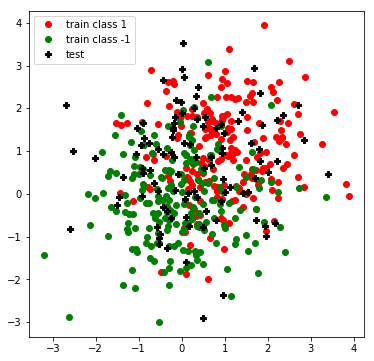

In [90]:
get_plot(X_train, X_test, Y_train)

0.67
[106 107]


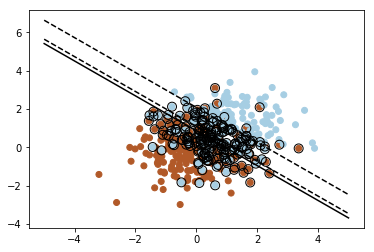

In [91]:
clf = svm.SVC(kernel='linear') 
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))
print(clf.n_support_)
plot_data_with_hyperplane(X_train,Y_train,clf)

**Question:** Comment the results.

### Linear SVM with cross-validated C value

Let us cross-validate an SVM with linear kernel (linear soft-margin SVM) to find the optimal C parameter. By default `C=1.0`.

**Question:** Complete the following cross-validation function. You can use `np.random.shuffle` function and smart indexation to write `get_cv_fold`.

In [92]:
def get_cv_fold(labels, n_folds):
    """
    cv_fold is a list of n_folds pairs of list of indices, first element of 
        the pair is the indices of the train test indices and second the
        indices for the test set
    """
    # TODO (je remplis pour que tu puisses dire si ça te va)
    cv_folds = list()
    n_samples = len(labels)
    fold_indices = range(n_samples)
    np.random.shuffle(fold_indices)
    len_fold = int(np.round(n_samples/float(n_folds)))
    for i in range(n_folds-1):
        test_set = fold_indices[i*len_fold:(i+1)*len_fold]
        train_set = [ind for ind in fold_indices if ind not in test_set]
        cv_folds.append([train_set, test_set])
    last_test_set = fold_indices[(i+1)*len_fold:]
    last_train_set = fold_indices[:(i+1)*len_fold]
    cv_folds.append([last_train_set, last_test_set])
    return cv_folds

Before going further, check carefully your cross-validation

In [ ]:
# test your get_cv_fold function to see if it works
cc = get_cv_fold(Y_train, 9)
for tr, te in cc: print(len(tr), len(te))
    
cc = get_cv_fold(Y_train, 10)
for tr, te in cc: print(len(tr), len(te))
    
# check that each sample is in the test set only once. Use Y_test (smaller)
# TODO

Now let's get to the complete cross-validation pipeline

In [93]:
def cross_validate(design_matrix, labels, classifier, cv_folds):
    """ Perform a cross-validation and returns, for each data point x, 
    the value of the decision function f computed when x was part of the test set. 
   
    Parameters:
    -----------
    design_matrix: (n_samples, n_features) np.array
        Design matrix for the experiment.
    labels: (n_samples, ) np.array
        Vector of labels.
    classifier:  sklearn classifier object
        Classifier instance; must have the following methods:
        - fit(X, y) to train the classifier on the data X, y
        - decision_function(X) to apply the trained classifier to the data X 
        and return probability estimates 
    cv_folds: iterable element that split the data for cross-validation.
        
    Return:
    -------
    pred: (n_samples, ) np.array
        Vectors of predictions (same order as labels).
    """
    pred = np.zeros(labels.shape) # Hold all predictions, in correct order.
    
    
            
        
    for tr, te in cv_folds:
        # Restrict data to train/test folds
        Xtr = design_matrix[tr, :]
        ytr = labels[tr]
        Xte = design_matrix[te, :]
        
        # Fit classifier
        classifier.fit(Xtr, ytr)

        # Compute decision function on test data
        # TODO 
        tmp_y_pred = classifier.predict(Xte)
        
        
        # Update pred 
        # TODO 
        pred[te] = tmp_y_pred
        
    return pred

Let us find the optimal C parameter via cross-validation

In [99]:
C_list = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 10000]
acc_list = list()
cv_folds = get_cv_fold(Y_train, 50)
for C in C_list:
    clf = svm.SVC(C=C, kernel='linear') 
    Y_pred = cross_validate(X_train, Y_train, clf, cv_folds)
    acc_list.append(metrics.accuracy_score(Y_train, Y_pred))
    clf = svm.SVC(C=C, kernel='linear')
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(metrics.accuracy_score(Y_test, Y_pred), C)
    

print(acc_list)

(0.68000000000000005, 0.001)
(0.67000000000000004, 0.003)
(0.66000000000000003, 0.01)
(0.66000000000000003, 0.03)
(0.66000000000000003, 0.1)
(0.67000000000000004, 0.3)
(0.67000000000000004, 1)
(0.67000000000000004, 3)
(0.67000000000000004, 10)
(0.67000000000000004, 30)
(0.67000000000000004, 100)
(0.67000000000000004, 300)
(0.67000000000000004, 1000)
(0.67000000000000004, 10000)
[0.71250000000000002, 0.76249999999999996, 0.76249999999999996, 0.76249999999999996, 0.76500000000000001, 0.76249999999999996, 0.76749999999999996, 0.76749999999999996, 0.76500000000000001, 0.76500000000000001, 0.76500000000000001, 0.76500000000000001, 0.76500000000000001, 0.76500000000000001]


**Question:** print the accuracy and plot the data with the hyperplance corresponding to the fitted SVM and compare with those of SVM with default C value

In [ ]:
## code avec des TODO

### Linear SVM with cross-validated C value (Bonus)

The cross-validation we have is a bit too simple. What happens if we ask for 50 folds, and there are only 40 points with label "1" in the train data? what happens if we ask 40 folds with 40 points with label "1"? 

What we have tried to do (find optimal C by trying a lot of values for C and evaluate performance by cross-validation on the train set is called "grid-search cross-validation" and there is a function for it in `scikit-learn`. Look into the [doc](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and try to get the same result as before.

In [ ]:
## code avec TODO


## Non linear case

In [ ]:
# load the corresponding data
X_train = 
X_test = 
Y_train =
Y_test = 

### Plot of the data

In [ ]:
## code


### Testing different kernels

demander à tester différent kernel en utilisant C manuellement (pour voir l'effet de C sur le separating hyperplane) puis print accuracy avec un C optimisé par crossCV

## A real case: The endometrium vs uterus cancer data

For this lab and many of the coming ones, we will work with gene expression data measured on endometrium and ovary tumors. The data originally comes from http://gemler.fzv.uni-mb.si/index.php but has been downsized so that it is easier to work with in our labs.

The data we will work with contains the expression of 3,000 genes, measured for 61 endometrium tumors and 123 uterus tumors.

Expliquer l'origine des données etc

### Loading the data
The data is stored in a CSV file, `small_Endometrium_Uterus.csv`. Many utilities can be used to read CSV files, including the `csv` module and the `pandas` module (that is meant for data mining). We will focus on using numpy directly.

A quick look at the file shows us that
* its first line is a header
* each of its lines is a tumor sample. 
* the first column of each line is the tumor sample's ID
* the last column of each line is the type of tissue (Endometrium or Uterus)
* all columns in between give the expression of one gene.

In [ ]:
# Load the gene expression data
X = np.loadtxt('data/real_case/small_Endometrium_Uterus.csv',  delimiter=',', 
               skiprows=1, usecols=range(1, 3001))

# Load the labels (Python 2)
y = np.loadtxt('data/real_case/small_Endometrium_Uterus.csv', delimiter=',', 
               skiprows=1, usecols=[3001], dtype='string')

# Python 3 alternative:
#y = np.loadtxt('data/small_Endometrium_Uterus.csv', delimiter=',', 
#               skiprows=1, usecols=[3001], dtype='bytes').astype('str')

# Convert 'Endometrium' to 0 and 'Uterus' to 1
y = np.where(y=='Endometrium', 0, 1)
print(y)

### Plot of the data by pca (??)

In [ ]:
## code


Expliquer en quoi consister scaler ou normaliser les données et parler de son interêt

**Question:** Complete the following cross-validation function

In [ ]:
## code

### Optimize an SVM approach

à eux de jouer blabla